<a href="https://colab.research.google.com/github/Leah-Wu/SI650/blob/main/code/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget -nc https://github.com/Leah-Wu/SI650/raw/main/results/bm25-annotation-final.csv
!wget -nc https://github.com/Leah-Wu/SI650/raw/main/results/main-results-annotation.csv

--2020-12-13 18:28:45--  https://github.com/Leah-Wu/SI650/raw/main/results/bm25-annotation-final.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Leah-Wu/SI650/main/results/bm25-annotation-final.csv [following]
--2020-12-13 18:28:45--  https://raw.githubusercontent.com/Leah-Wu/SI650/main/results/bm25-annotation-final.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17621 (17K) [text/plain]
Saving to: ‘bm25-annotation-final.csv’

bm25-annotation-fin 100%[===================>]  17.21K  --.-KB/s    in 0s      

2020-12-13 18:28:45 (40.4 MB/s) - ‘bm25-annotation-final.csv’ saved [17621/17621]

--20

In [5]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
bm25_annotation_df = pd.read_csv("bm25-annotation-final.csv",encoding='utf-8')
main_annotation_df = pd.read_csv("main-results-annotation.csv",encoding='utf-8')

In [7]:
def get_dcg(retrieved_list):
  # relevance of retrieved docs
  dcg = 0.0
  for order, rel in enumerate(retrieved_list):
    dcg += float(rel)/math.log((order+2), 2)
  return dcg

def get_ndcg(ideal_list, retrieved_list):
  return get_dcg(retrieved_list)/get_dcg(ideal_list)

def precision_at_k(ideal_list, retrieved_list, k):
  relevant = 0.0
  for order, rel in enumerate(retrieved_list[:k]):
    if rel == ideal_list[order]:
      relevant += 1.0
  precision = relevant/k
  return precision

def precision(ideal_list, retrieved_list):
  return precision_at_k(ideal_list, retrieved_list, len(ideal_list))

def PR_curve(ideal_list, retreived_list):
  count = 0
  for rel in ideal_list:
    if rel == 1: 
      count += 1
  recall_list = []

  curr = 0
  for rel in retreived_list:
    if rel == 0: 
      recall_list.append(0)
    else:
      curr += 1
      recall_list.append(curr / count)

  xval=[]
  yval=[]
  for i in range(len(ideal_list)):
    if recall_list[i] != 0:
      xval.append(recall_list[i])
      p=precision_at_k(ideal_list, retreived_list, i+1)
      yval.append(p)
  plt.xlabel('Recall')
  plt.ylabel('Precison')
  plt.plot(xval, yval)

In [8]:
def evaluate(annotation_df, k):
  relevance_list = annotation_df["relevance"].tolist()
  ndcg_list=[]
  ndcg_sum = 0
  precision_at_k_sum = 0
  for i in range(20):
    retrieved_list = relevance_list[i*10:(i+1)*10]
    ideal_list = []
    ideal_list.extend(retrieved_list)
    ideal_list.sort(reverse=True)
    ndcg=get_ndcg(ideal_list, retrieved_list)
    ndcg_list.append(ndcg)
    ndcg_sum += ndcg
    curr_precision_at_k = precision_at_k(ideal_list, retrieved_list, k)
    precision_at_k_sum += curr_precision_at_k
    PR_curve(ideal_list, retrieved_list)
  mean_ndcg = ndcg_sum / 20
  mean_precesion_at_k = precision_at_k_sum / 20
  return mean_ndcg, mean_precesion_at_k

BM25 searching results:
mean ndcg for this system is: 0.6761585278676632
mean precision@5 for this system is: 0.67


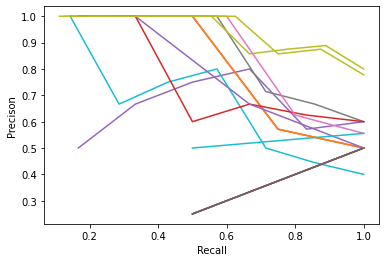

In [9]:
print("BM25 searching results:")
mean_ndcg, mean_precison_at_k = evaluate(bm25_annotation_df, 5)
print(f"mean ndcg for this system is: {mean_ndcg}")
print(f"mean precision@5 for this system is: {mean_precison_at_k}")

Main method searching results:
mean ndcg for this system is: 0.7832844067602602
mean precision@5 for this system is: 0.63


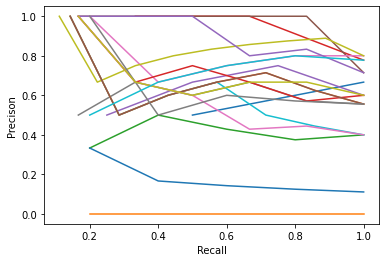

In [10]:
print("Main method searching results:")
mean_ndcg, mean_precison_at_k = evaluate(main_annotation_df, 5)
print(f"mean ndcg for this system is: {mean_ndcg}")
print(f"mean precision@5 for this system is: {mean_precison_at_k}")